https://mkaz.blog/code/python-string-format-cookbook/

abalone #4177 건
- 7:3 비율로 train set/ test set 데이터를 분할 (random state = 20201005)
- train set -> 모델 -> test set -> 나이를 예측 (rings) => rmsle적용 => 점수 출력
- random forest regressor 이용

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import sklearn.preprocessing as preproc

In [3]:
abalone=pd.read_csv("abalone.txt", header=None, sep=",", 
            names=['sex','length','diameter','height','whole_weight','shucked_weight',
                   'viscera_weight','shell_weight','rings'])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# minmax scaling 
# sex 수치화 get_dummies()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

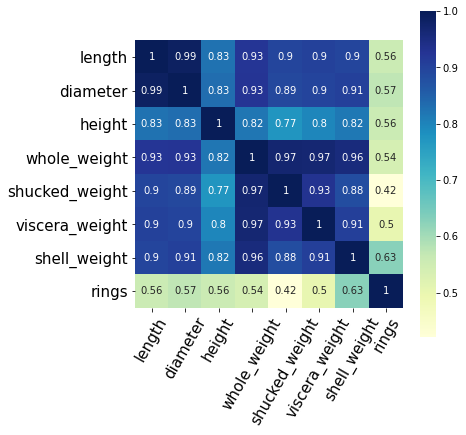

In [16]:
corr=abalone.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, annot_kws={'size':10}, cmap="YlGnBu", square=True)
plt.xticks(rotation=60, size=15)
plt.yticks(rotation=0, size=15)
#모두 상관관계가 있다.

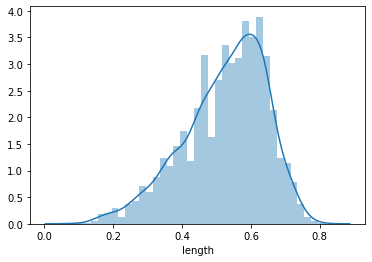

In [20]:
abalone.columns
abalone['length'].describe()
sns.distplot(abalone['length'])

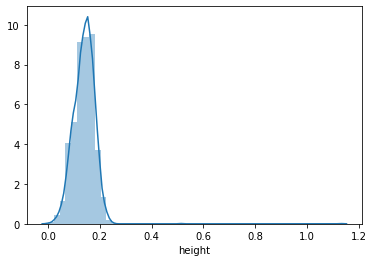

In [25]:
sns.distplot(abalone['height'])

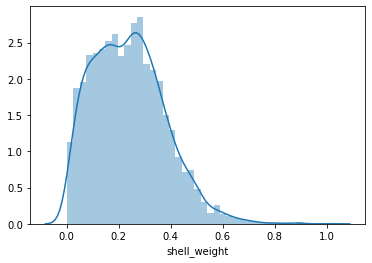

In [28]:
sns.distplot(abalone['shell_weight'])

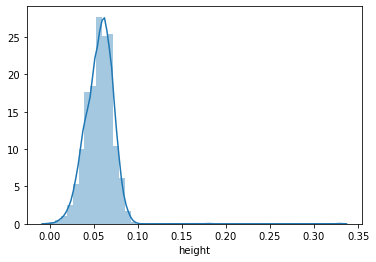

In [27]:
sns.distplot(np.log10(abalone['height']+1))

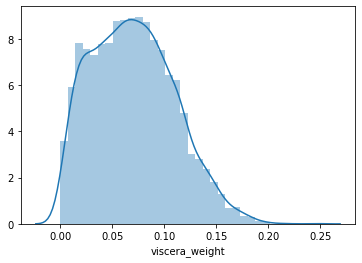

In [34]:
sns.distplot(np.log10(abalone['viscera_weight']+1))

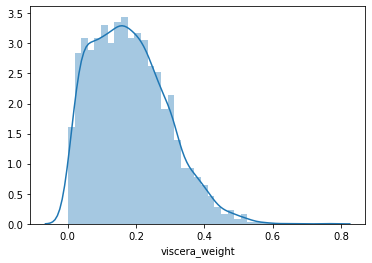

In [31]:
sns.distplot(abalone['viscera_weight'])

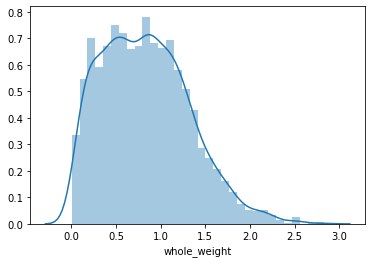

In [39]:
sns.distplot(abalone['whole_weight'])

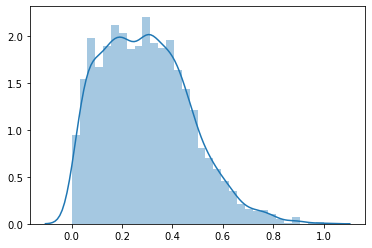

In [38]:
sns.distplot(preproc.minmax_scale(abalone['whole_weight']))

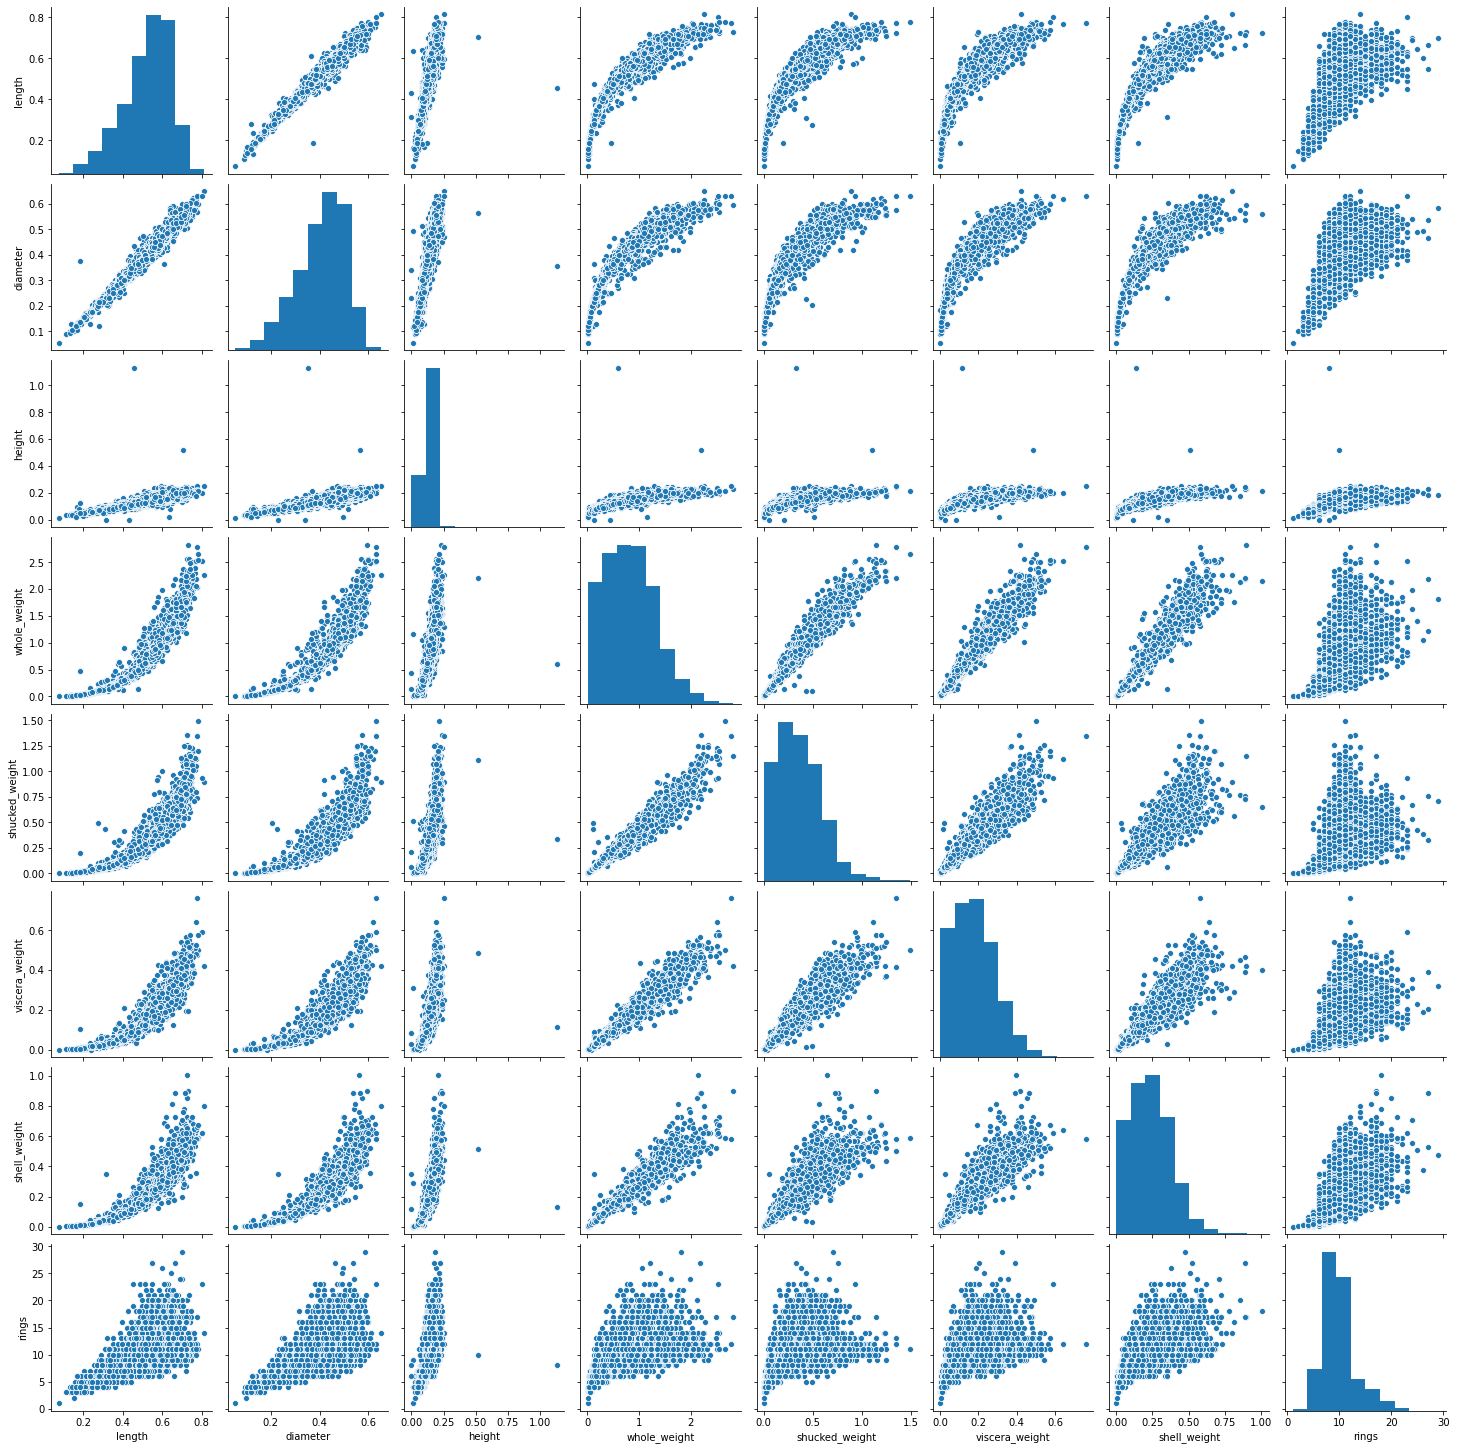

In [24]:
cols=['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
sns.pairplot(abalone[cols], height=2.5)

## 이상치 제거

In [56]:
#height 에 이상치가 있어보임
from scipy import stats
abalone['height_zscore']=stats.zscore(abalone['height'])
abalone=abalone[abalone['height_zscore'].between(-2,2)] #이상치 제거
# df_height.between(-2,2)

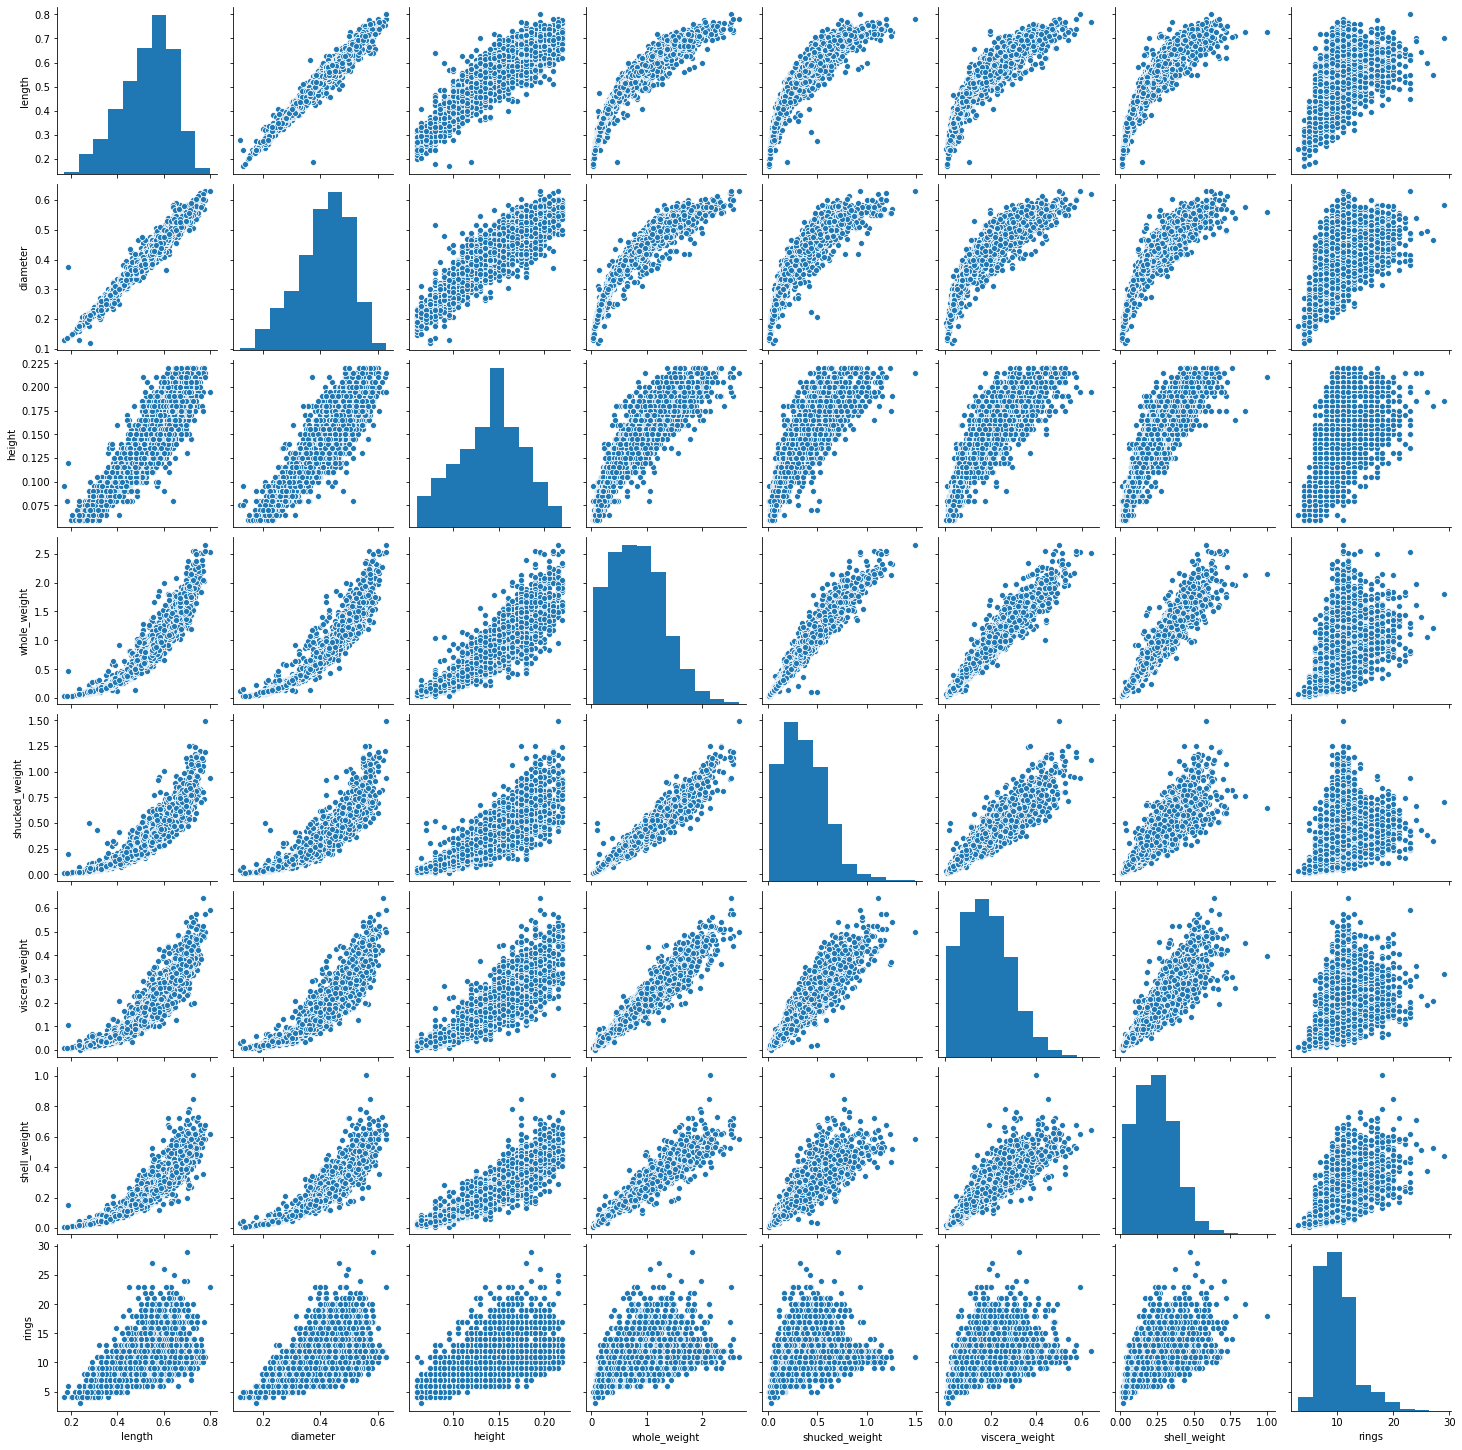

In [58]:
cols=['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings']
sns.pairplot(abalone[cols], height=2.5)
#이상치 제거후 좀더 선형적인 그래프들을 관찰할 수 있음 4177에서 4048로 129행 줄음

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

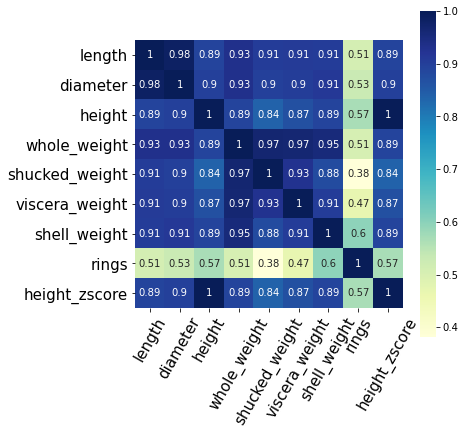

In [62]:
corr=abalone.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, annot_kws={'size':10}, cmap="YlGnBu", square=True)
plt.xticks(rotation=60, size=15)
plt.yticks(rotation=0, size=15)

In [71]:
# SEX 컬럼을 수치화 해보기
df_sex=pd.get_dummies(abalone['sex'], prefix='sex')
df_sex

,sex_F,sex_I,sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [75]:
abalone=pd.concat([abalone, df_sex], axis=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text major ticklabel objects>)

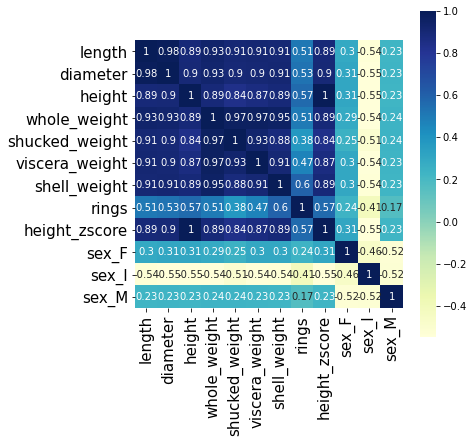

In [79]:
corr=abalone.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, annot=True, annot_kws={'size':10}, cmap="YlGnBu", square=True)
plt.xticks(rotation=90, size=15)
plt.yticks(rotation=0, size=15)

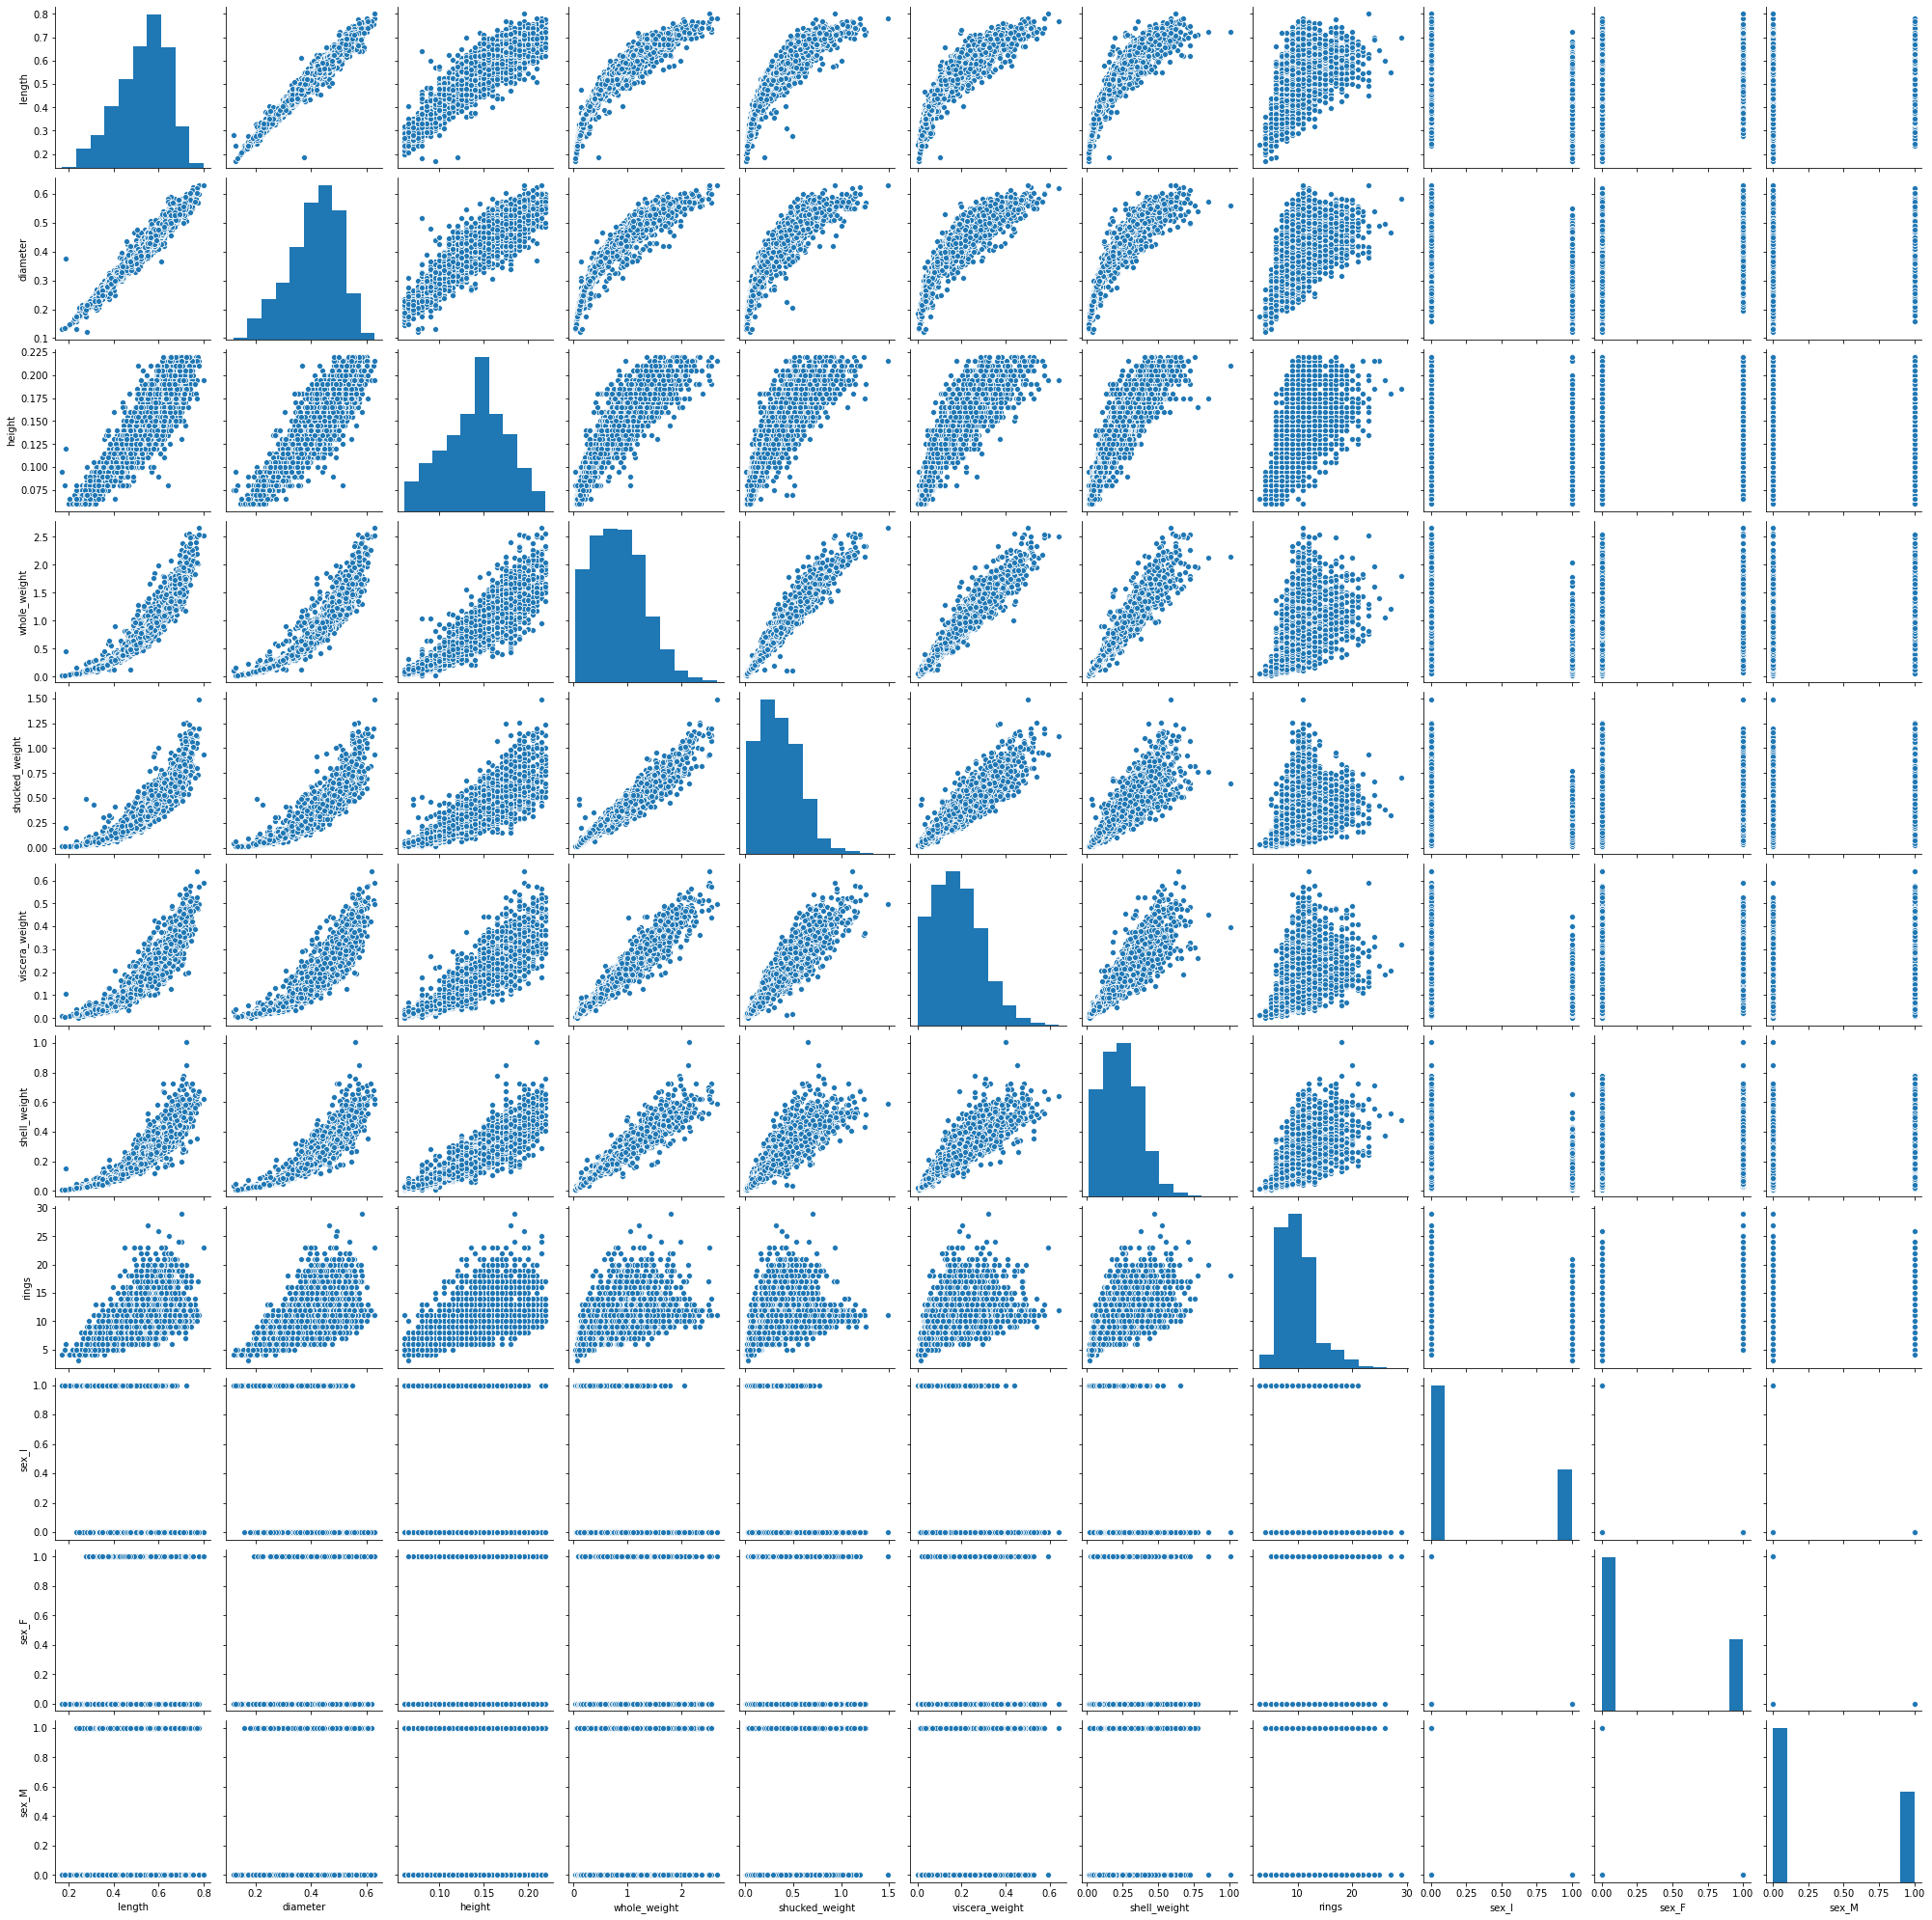

In [78]:
cols=['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','rings', 'sex_I', 'sex_F', 'sex_M']
sns.pairplot(abalone[cols], height=2.5)

In [118]:
x_cols=['length','diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight', 'sex_I', 'sex_F', 'sex_M']
y_col=['rings']
x=abalone[x_cols].values
y=abalone[y_col]

In [119]:
y=np.array(y).ravel()
y.shape

(4048,)

In [120]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=20201005)

In [121]:
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))

2833
1215
2833
1215


In [122]:
len(xtest)/len(x)*100, len(xtrain)/len(x)*100
# 7:3 비율로 나뉨

(30.01482213438735, 69.98517786561264)

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid={
    'n_estimators': range(10,500,10),
    'min_samples_split': range(2,10,2),
    'max_depth' : range(3,15,3)
}

In [132]:
rfr=RandomForestRegressor(random_state=20201005)

In [134]:
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=10)
CV_rfr.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20201005),
             n_jobs=10,
             param_grid={'max_depth': range(3, 15, 3),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 500, 10)})

In [135]:
CV_rfr.best_params_

{'max_depth': 9, 'min_samples_split': 8, 'n_estimators': 490}

In [136]:
CV_rfr.best_score_

0.5192448291209014

In [148]:
model=RandomForestRegressor(n_estimators=490, min_samples_split=8, max_depth=9, random_state=20201005, n_jobs=10) #default : 100
#n_estimators = 11, 31, 51
#max_depth = 3, 5, 7
#min_samples_split: 4, 6, 8 ,10
model.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=9, min_samples_split=8, n_estimators=490,
                      n_jobs=10, random_state=20201005)

In [149]:
model.score(xtrain,ytrain)

0.7646044966510377

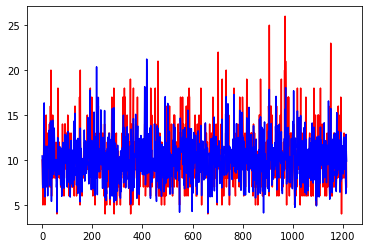

In [146]:
ypred=model.predict(xtest)
plt.plot(ytest, color='red')
plt.plot(ypred, color='blue')

In [168]:
ytest

array([10,  9,  7, ..., 10, 11,  7])

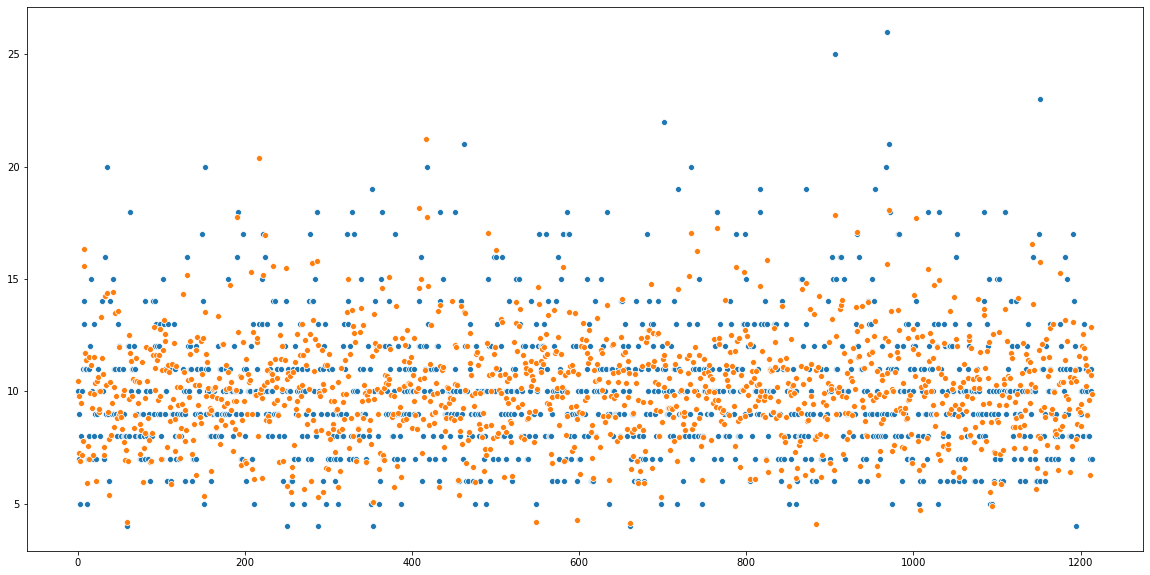

In [188]:
plt.figure(figsize=[20,10])
plt.subplot(111)
sns.scatterplot(data=ytest,  hue="size", palette="deep")
sns.scatterplot(data=ypred,  hue="size", palette="deep")

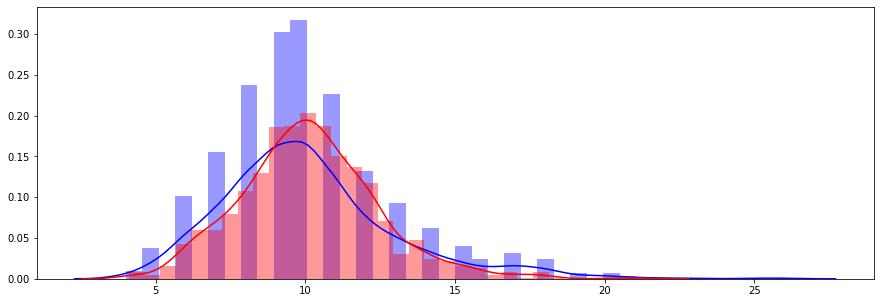

In [162]:
plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(ytest, kde=True, 
             color='blue')
sns.distplot(ypred, 
             kde=True, color='red')

In [151]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(ypred, ytest))

0.17127036682695454

https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/